# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [2]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">To ease the plotting, we will create a Pandas dataframe containing the data
and target</p>
</div>

In [3]:
import pandas as pd
full_data = pd.DataFrame({"data": data, "target": target})

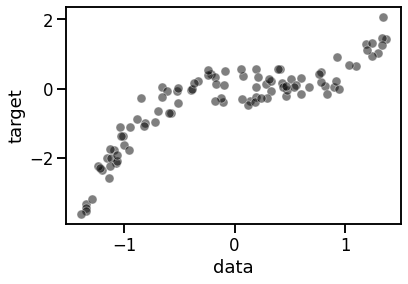

In [4]:
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model.

In [5]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

In [37]:
output = f(data, 1, 0)

In [34]:
target

array([-0.35633211,  0.30747079,  0.12212491, -0.46678511,  0.41385928,
        0.55349827,  0.3330271 ,  0.66436826,  1.02420865,  0.22831679,
        0.09043958,  0.36399024,  0.05124864,  1.27521844, -2.34716172,
       -2.00119654, -3.32359961,  0.90989555,  0.20721453,  0.69595775,
        2.07378085, -0.16742069, -0.38821689,  0.46695593, -2.14417183,
        0.56647542, -1.61853563,  0.93078066,  0.57524034,  0.40196394,
        0.05645661,  0.42974038, -0.26775591,  0.56169672, -3.43425352,
        0.22222616,  0.26583915, -0.06500424,  1.33048172,  0.27901972,
       -0.02531913, -0.35084362,  0.10581336, -2.22730458, -0.21557725,
       -0.04996135, -0.99262016, -1.10663093, -0.06988161, -0.00614683,
       -0.24269775,  0.14191627,  1.41974807, -1.99474656, -1.06461711,
       -1.09960854,  0.15987387, -0.63070992,  0.1135136 , -0.95042577,
       -1.77394984, -1.76168464,  0.03806967, -1.36244327, -0.25913276,
        0.16612882,  0.0482916 , -1.73691207,  0.00478774, -2.22

Compute the mean squared error for this model

In [35]:
from math import sqrt

squared_error = (output - target) ** 2
sum_squared_error = sum(squared_error)
mse = sqrt(sum_squared_error/(len(target)))
mse

0.8917627708566316

Train a linear regression model on this dataset.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [17]:
np.ravel(data)

array([ 0.13667781,  0.60253023,  0.28773745,  0.12567291, -0.21376656,
        0.40850352, -0.17475581,  1.0969644 ,  1.29825573, -0.32636375,
        0.81683011,  0.08090578,  0.19052477,  1.19167059, -1.20109904,
       -1.15603796, -1.34338849,  0.93133557,  0.7788389 ,  1.03603402,
        1.34013136,  0.83764398, -0.10785779,  0.78548169, -1.06883161,
        0.39177886, -0.9986108 ,  1.24507297,  0.0611753 , -0.23894657,
       -0.65924429,  0.76785433, -0.12277907,  0.19161506, -1.34738856,
        0.32937939,  0.31386802,  0.32741519,  1.24249462,  0.50909684,
       -0.39337788, -0.17631053,  0.55336735, -1.23136868,  0.4669468 ,
        0.47778603, -0.81092883, -1.03900637, -0.51680062, -0.38160984,
        0.19655096, -0.17191576,  1.36744675, -1.11427453, -0.81514508,
       -0.94833335,  0.42870331, -0.69078351, -0.09432984, -0.71560834,
       -0.95488517, -1.0909496 ,  0.43772285, -1.01308774, -0.84956939,
       -0.36756952,  0.89878104, -1.12811643,  0.94624574, -1.13

In [23]:
pd.Series(target)

0    -0.356332
1     0.307471
2     0.122125
3    -0.466785
4     0.413859
        ...   
95   -0.886979
96   -0.256148
97   -3.535712
98    0.220502
99   -3.623854
Length: 100, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pd.DataFrame(data), pd.Series(target))

LinearRegression()

Compute predictions from the linear regression model and plot both the data
and the predictions.

In [26]:
predictions = model.predict(pd.DataFrame(data))

Compute the mean squared error

In [39]:
error1 = mean_squared_error(target, output)
error1

0.5055662351753992

In [29]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(pd.DataFrame(target), predictions)

In [30]:
error

0.37117544002508424

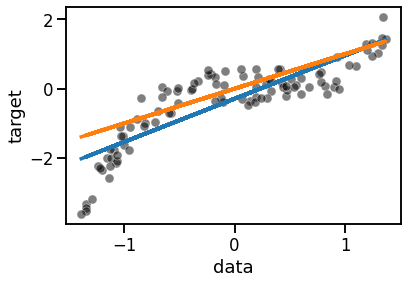

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)
plt.plot(data, predictions)
plt.plot(data, output)